# Project-3 : World Happiness Report

**Project Description : The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.**

**What is Dystopia?**

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

**What are the residuals?**

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

**What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?**

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


**To Predict** : **"Happiness score"** considering all the other factors mentioned in the dataset.**

In [119]:
# Let's start with importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [120]:
# Importing  Dataset :

data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [121]:
# To Display top 5 Rows:

data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [122]:
# To Display all Columns:

data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

**There are 158 rows and 12 columns , where some of them are of object datatype , int datatype and float datatype.**

In [124]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

**Here , Country and Region are of object datatype , as they have string values. Happiness Rank is of int datatype , and all other are of Float Datatype.**

In [125]:
# Checking for null values:

data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**There are no null values present , let's go ahead.**

In [126]:
# Converting Happiness Rank into float Datatype for better prediction:

data['Happiness Rank']= data['Happiness Rank'].astype(float)

In [127]:
# Let's Verify , If this column is converted to float datatype or not:

data.dtypes

Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

**AS there are two type of data , Nominal data and Continuous data . Let's create individual dataframe for both type of data , So it'll be easy to understand.**

In [128]:
# Dataframe of Nominal Data :

data_nominal = data[['Country','Region']].copy()
data_nominal.columns

Index(['Country', 'Region'], dtype='object')

In [129]:
# Dataframe of Continuous Data:

data_cont = data[['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)', 'Family','Health (Life Expectancy)','Freedom',
                 'Trust (Government Corruption)','Generosity','Dystopia Residual']].copy()

data_cont.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

# Data Visualization :

<Axes: xlabel='Happiness Rank', ylabel='Density'>

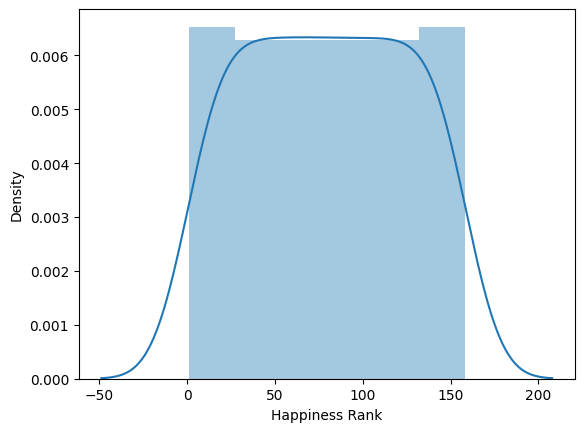

In [130]:
sns.distplot(data_cont['Happiness Rank'],kde=True)

<Axes: xlabel='Happiness Score', ylabel='Density'>

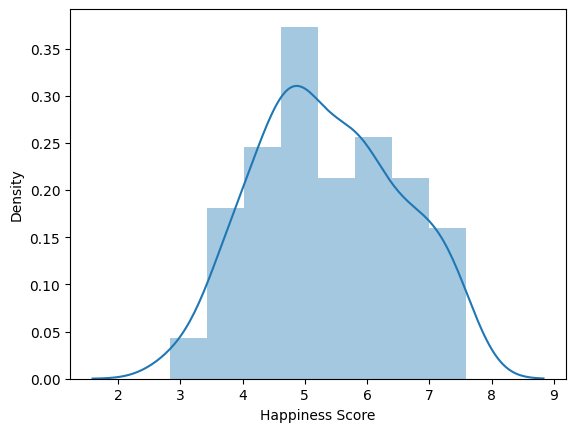

In [131]:
sns.distplot(data_cont['Happiness Score'],kde=True)

<Axes: xlabel='Standard Error', ylabel='Density'>

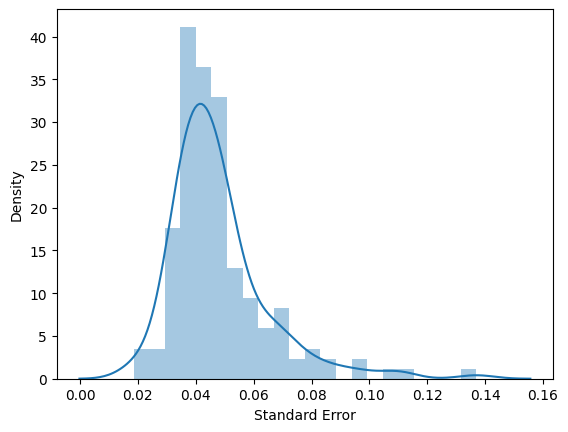

In [132]:
sns.distplot(data_cont['Standard Error'],kde=True)

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Density'>

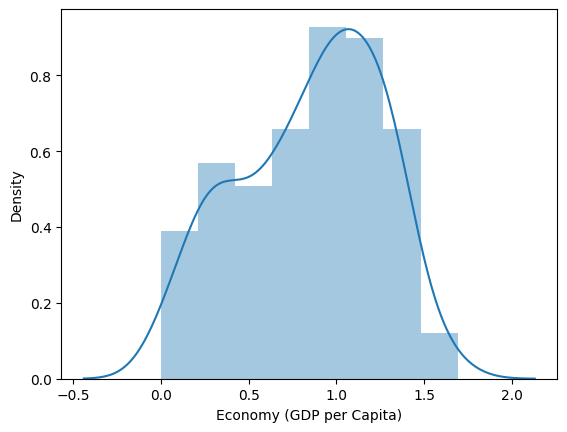

In [133]:
sns.distplot(data_cont['Economy (GDP per Capita)'],kde=True)

<Axes: xlabel='Family', ylabel='Density'>

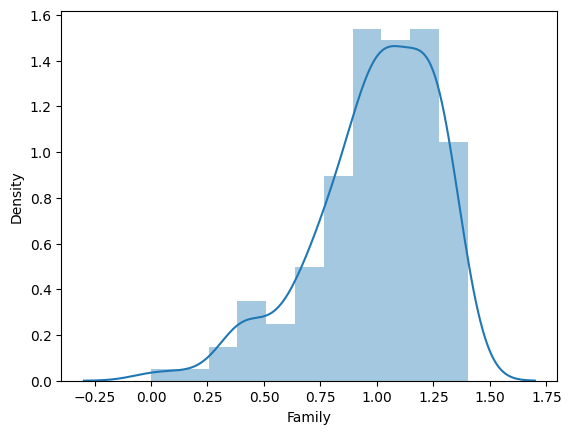

In [134]:
sns.distplot(data_cont['Family'],kde=True)

<Axes: xlabel='Health (Life Expectancy)', ylabel='Density'>

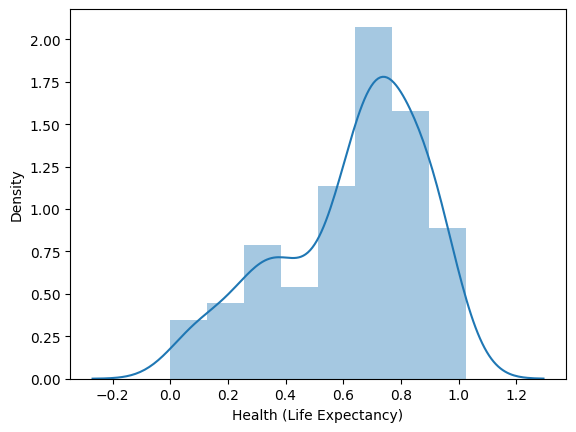

In [135]:
sns.distplot(data_cont['Health (Life Expectancy)'],kde=True)

<Axes: xlabel='Freedom', ylabel='Density'>

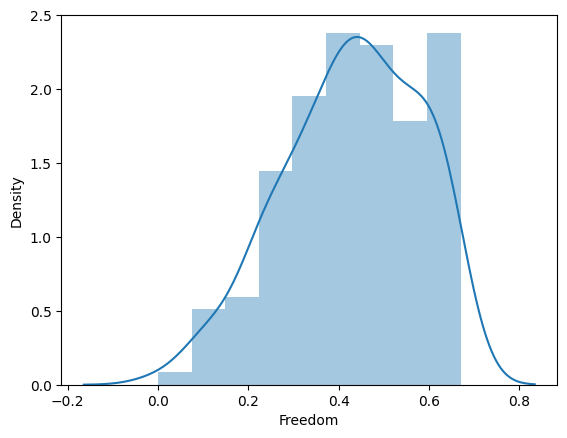

In [136]:
sns.distplot(data_cont['Freedom'],kde=True)

<Axes: xlabel='Trust (Government Corruption)', ylabel='Density'>

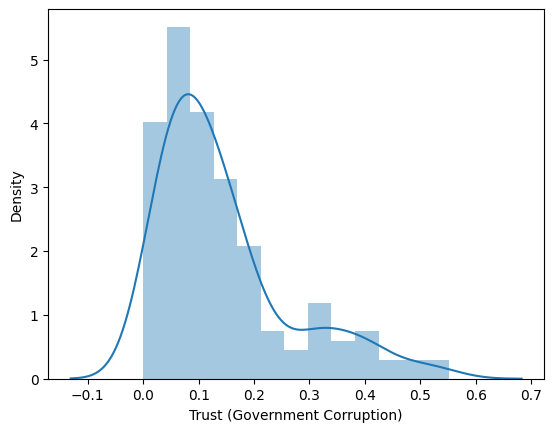

In [137]:
sns.distplot(data_cont['Trust (Government Corruption)'],kde=True)

<Axes: xlabel='Generosity', ylabel='Density'>

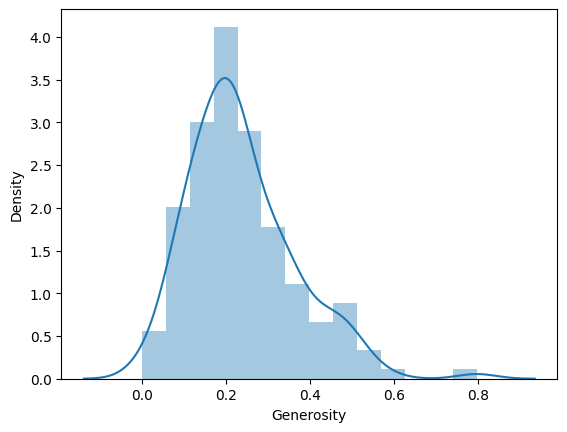

In [138]:
sns.distplot(data_cont['Generosity'],kde=True)

<Axes: xlabel='Dystopia Residual', ylabel='Density'>

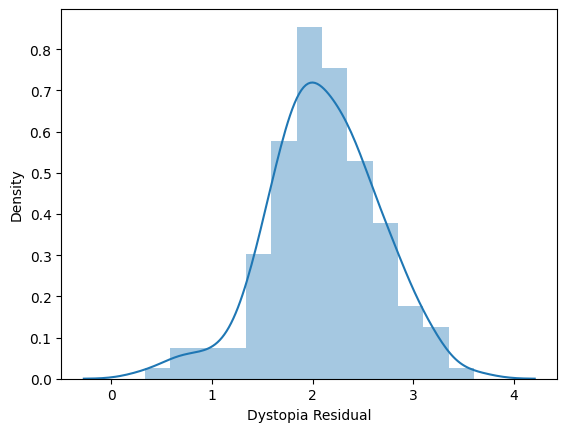

In [139]:
sns.distplot(data_cont['Dystopia Residual'],kde=True)

**As system only understand numeric values , and we have two columns which have string values. So , We have to transform these values to numerics using Ordinal Encoder.**

**Ordinal Encoder** is a technique which is used to tranform the string data to numeric data or simply convert to that type which is easy to understand for system.

In [140]:
# let's use Ordinal Encoder for those columns which have object datatype basically :

# Importing OrdinalEncoder:

from sklearn.preprocessing import OrdinalEncoder

# Let's initialize OrdinalEncoder:

Encoder = OrdinalEncoder()

In [141]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i] = Encoder.fit_transform(data[i].values.reshape(-1,1))

In [142]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [143]:
# To Display complete Statistics of Dataset:

data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<Axes: >

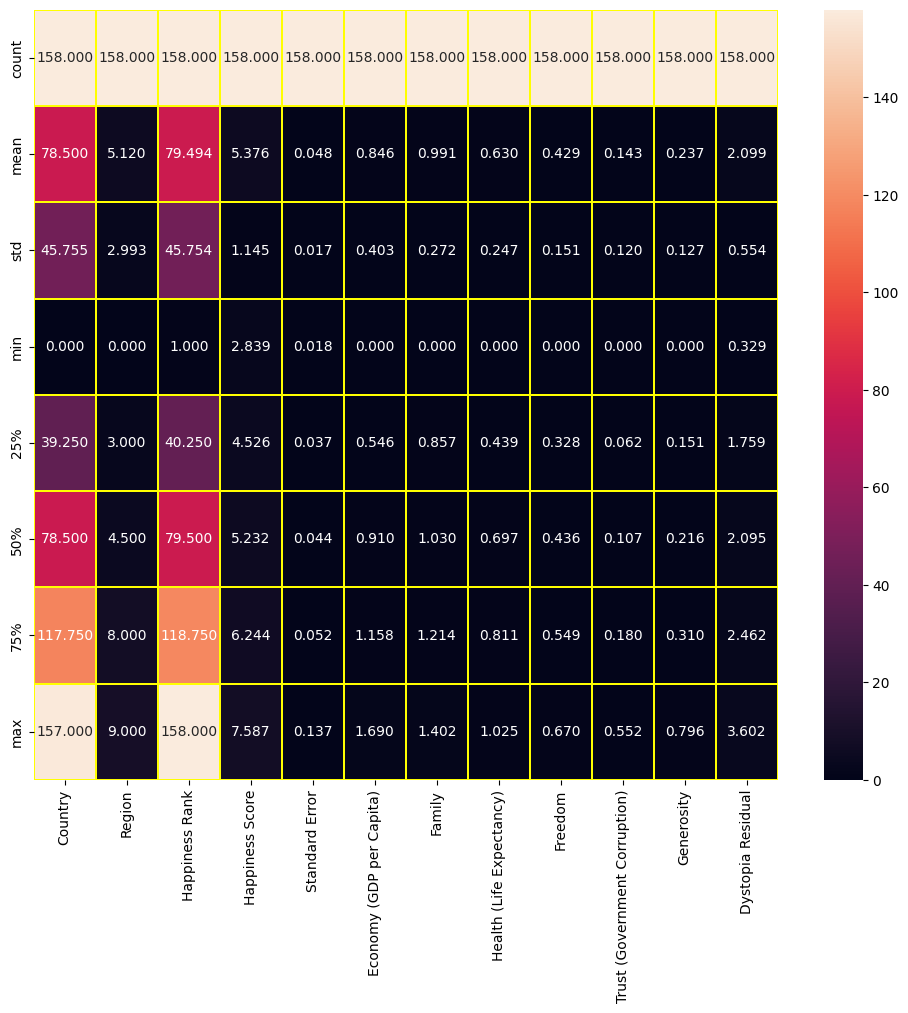

In [144]:
# Let's have visualiation of Statistics of data:

plt.figure(figsize=(12,10))
sns.heatmap(data.describe(),annot= True, linewidth=0.1, linecolor="Yellow", fmt="0.3f")

In [145]:
#Let's check for Correlation with label:

data.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<Axes: >

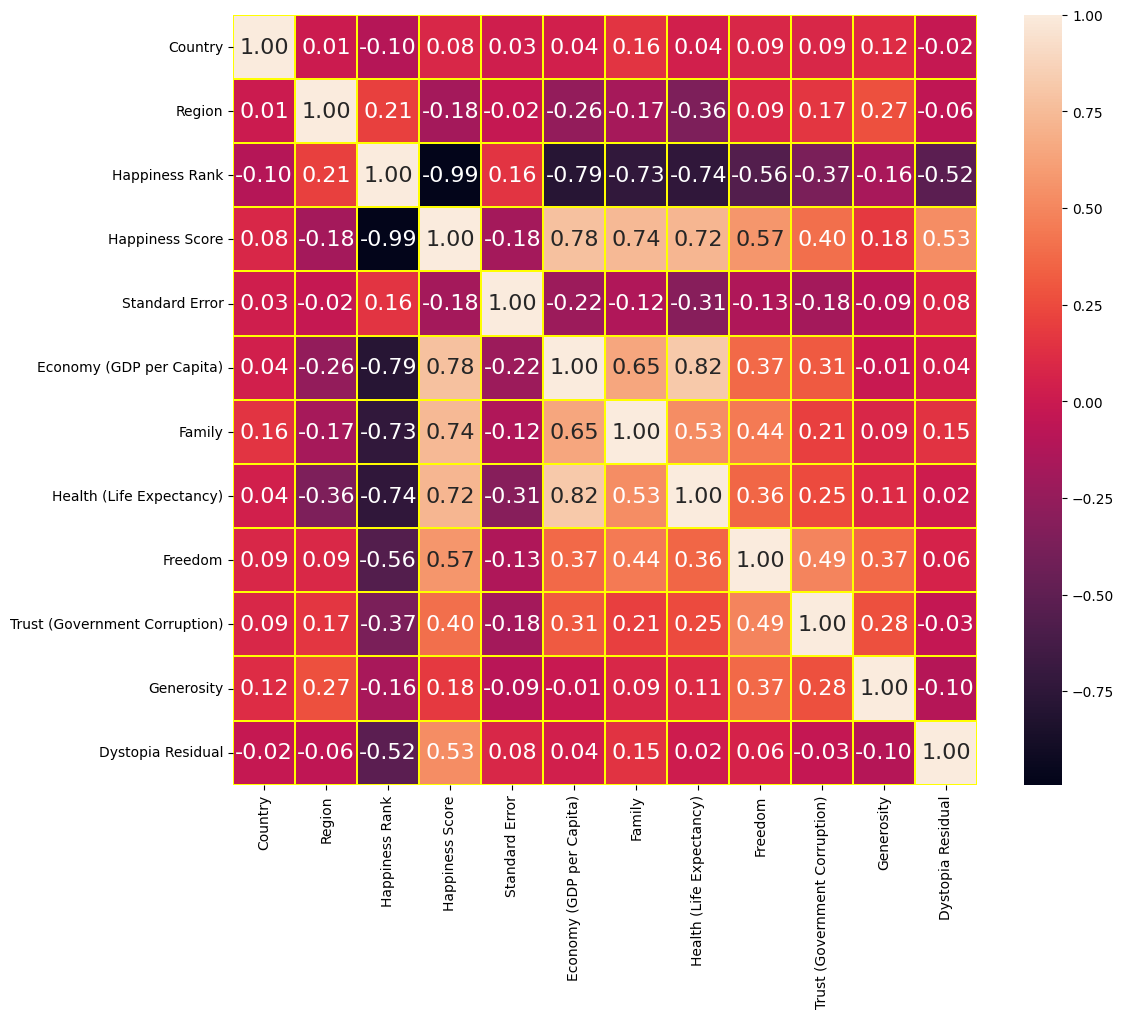

In [146]:
# Let's Visualize above data:

plt.figure(figsize=(12,10))
sns.heatmap(data.corr() ,annot = True ,linecolor = 'Yellow' ,linewidth=0.1,fmt="0.2f", annot_kws={"size": 16})

**Here , Happiness Score and Economy (GDP per Capita) are seems to be Correlated . So we can drop one of them.**

In [147]:
data.drop(columns='Happiness Score',axis=1)

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154.0,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156.0,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157.0,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


**As we have seen in Distribution plots of all features , there's some skewness . Let's check for skewness.**

In [148]:
data.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

**As per report of skewness , Standard error is has more skewness  , so let's drop this column.**

In [149]:
data.drop(['Standard Error'],axis=1, inplace=True )


# Removing Multicollinearity

In [150]:
def  cal_vif(x):
    vif =pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

# Outliers removal with Scipy

In [151]:
import scipy
from scipy.stats import zscore

z= np.abs(zscore(data))
z

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [152]:
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [153]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  9,  5,  8, 10,  5], dtype=int64))


In [154]:
z

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [155]:
z.iloc[40]

Country                          1.392246
Region                           0.710580
Happiness Rank                   0.843987
Happiness Score                  0.694129
Economy (GDP per Capita)         0.910039
Family                           0.708987
Health (Life Expectancy)         0.062646
Freedom                          0.866924
Trust (Government Corruption)    1.103367
Generosity                       0.642559
Dystopia Residual                0.307801
Name: 40, dtype: float64

In [156]:
data_new= data[(z<3).all(axis=1)]

In [157]:
print('old_dataframe',data.shape)
print('new_dataframe', data_new.shape)
print('total_dropped_rows', data.shape[0]-data_new.shape[0])


old_dataframe (158, 11)
new_dataframe (152, 11)
total_dropped_rows 6


In [158]:
loss_percent=((158-149)/158)*100
loss_percent

5.69620253164557

In [159]:
data_new

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151.0,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152.0,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155.0,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [160]:
x=data_new.iloc[:,:-1]

In [161]:
y=data_new.iloc[:,-1]

In [162]:
# Let's Standardize the data:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.26399072,  1.30435496, -1.72089178, ...,  1.58646238,
         2.49273763,  0.54630641],
       [-0.42691651,  1.30435496, -1.69841   , ...,  1.34083622,
         0.02815737,  1.7233747 ],
       [-0.88807303,  1.30435496, -1.67592822, ...,  1.47840022,
         3.05759077,  0.92266117],
       ...,
       [-1.7005869 ,  0.64016081,  1.69633931, ..., -1.29317062,
        -0.36375986,  1.12269192],
       [-1.41510905,  0.97225788,  1.74130288, ...,  0.37788823,
        -0.51508985, -0.41697956],
       [-1.23943038,  0.97225788,  1.78626644, ..., -2.06502414,
        -0.3333876 , -0.29321528]])

In [163]:
# Let's Create Model:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [164]:
lr=LinearRegression()

In [165]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state' , {i} , ':' , 'the training accuracy is : ',{r2_score(y_train,pred_train)})
    print('At random state' , {i} , ':' , 'the testing accuracy is : ',{r2_score(y_test,pred_test)},'\n')

At random state {0} : the training accuracy is :  {0.9999997663749547}
At random state {0} : the testing accuracy is :  {0.9999994791022829} 

At random state {1} : the training accuracy is :  {0.9999997502907543}
At random state {1} : the testing accuracy is :  {0.999999591282079} 

At random state {2} : the training accuracy is :  {0.999999739791925}
At random state {2} : the testing accuracy is :  {0.9999996148931889} 

At random state {3} : the training accuracy is :  {0.9999997193859251}
At random state {3} : the testing accuracy is :  {0.9999997335906201} 

At random state {4} : the training accuracy is :  {0.9999997565384604}
At random state {4} : the testing accuracy is :  {0.9999994701225404} 

At random state {5} : the training accuracy is :  {0.9999997489592334}
At random state {5} : the testing accuracy is :  {0.9999995804326962} 

At random state {6} : the training accuracy is :  {0.9999997844229431}
At random state {6} : the testing accuracy is :  {0.9999989610308048} 

A

**Overall Conclusion by Linear Regression Algorithm is:**

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=5, test_size=0.20)

In [167]:
lr.fit(x_train,y_train)

LinearRegression()

In [168]:
pred_test=lr.predict(x_test)

In [169]:
print({r2_score(y_test,pred_test)})

{0.9999995804326962}


In [170]:
print('R2 score is ',r2_score(pred_test,y_test))
print('mean_squared_error', mean_squared_error(pred_test,y_test))

R2 score is  0.9999995805280815
mean_squared_error 9.497415632946957e-08


**Here , R2 Score is 99.8 percent , and mean squared error is very very less. Let's try on another algorithms,**

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [172]:
rf=RandomForestRegressor(n_estimators=10, bootstrap=True, random_state=2000)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Random_forestregressor result :-')
print('R2 score is :',r2_score(pred,y_test))
print('mean_squared_error :', mean_squared_error(pred,y_test))

Random_forestregressor result :-
R2 score is : -0.32975194549207143
mean_squared_error : 0.11230022808209679


In [173]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print('AdaBoostregressor Result')
print('R2 score is ',r2_score(pred_test,y_test))
print('mean_squared_error', mean_squared_error(pred_test,y_test))

AdaBoostregressor Result
R2 score is  0.9999995805280815
mean_squared_error 9.497415632946957e-08


# Comparing R2 score of different models:



In [174]:
linear=lr.score(x_train, y_train)
Random=rf.score(x_train,y_train)
Ada=ab.score(x_train,y_train)
print(linear,'\n')
print(Random,'\n')
print(Ada)

0.9999997489592334 

0.9358347140608675 

0.8690883527340999


In [175]:
# Let's use Simple Tuning Techniques:

pred_rf= rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lrf= r2_score(y_test,pred_rf)
for j in range(2,10):
    lrfscore=cross_val_score(rf,x,y,cv=j)
    lrfs= lrfscore.mean()
    print('At cv:',j)
    print('cross_validation_score is:',lrfs*100)
    print('R2_score is :',lrf*100)
    print("\n")

At cv: 2
cross_validation_score is: -145.3195965196163
R2_score is : 50.38913139432455


At cv: 3
cross_validation_score is: -86.24019564293936
R2_score is : 50.38913139432455


At cv: 4
cross_validation_score is: -44.59512325587968
R2_score is : 50.38913139432455


At cv: 5
cross_validation_score is: -76.93997092251126
R2_score is : 50.38913139432455


At cv: 6
cross_validation_score is: -21.876858487215888
R2_score is : 50.38913139432455


At cv: 7
cross_validation_score is: -33.50289739798854
R2_score is : 50.38913139432455


At cv: 8
cross_validation_score is: -48.34651230120815
R2_score is : 50.38913139432455


At cv: 9
cross_validation_score is: -10.040981940598206
R2_score is : 50.38913139432455




In [176]:
# Let's find the cv score by taking the mean. 

lrfscore_selected=cross_val_score(rf,x,y,cv=5).mean()
print("cv score  is:",lrfscore_selected,"\n accuracy_score is:",lrfs)

cv score  is: -0.7693997092251126 
 accuracy_score is: -0.10040981940598205


In [177]:
# Let's create a DataFrame to compare original and predicted values.

import numpy as np
a =np.array(y_test)
predicted=np.array(rf.predict(x_test))
df=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
df

,Orginal,Predicted
0,1.86040,1.760592
1,2.11773,2.385048
2,2.27513,2.213304
3,2.23741,2.280804
4,1.68135,1.704417
5,2.13090,2.278883
6,2.70201,2.276765
7,0.65429,1.811212
8,2.11569,2.181591
9,1.93129,1.872914


# Conclusion:

**So ,Here we have predicted the happiness score considering all the other factors mentioned in the dataset.Based on above DataFrame of original and predicted values , we conclude that our predicted values are very much approximate to original values.**

**We have used different models to predict the approximate result , and also used cross validation technique to tune the features.**